In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import time
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss

In [2]:
hitters = sm.datasets.get_rdataset('Hitters', 'ISLR')

In [3]:
print(hitters.__doc__)

======= ===============
Hitters R Documentation
======= ===============

Baseball Data
-------------

Description
~~~~~~~~~~~

Major League Baseball Data from the 1986 and 1987 seasons.

Usage
~~~~~

::

   Hitters

Format
~~~~~~

A data frame with 322 observations of major league players on the
following 20 variables.

``AtBat``
   Number of times at bat in 1986

``Hits``
   Number of hits in 1986

``HmRun``
   Number of home runs in 1986

``Runs``
   Number of runs in 1986

``RBI``
   Number of runs batted in in 1986

``Walks``
   Number of walks in 1986

``Years``
   Number of years in the major leagues

``CAtBat``
   Number of times at bat during his career

``CHits``
   Number of hits during his career

``CHmRun``
   Number of home runs during his career

``CRuns``
   Number of runs during his career

``CRBI``
   Number of runs batted in during his career

``CWalks``
   Number of walks during his career

``League``
   A factor with levels ``A`` and ``N`` indicating player's league

In [4]:
# data
hitters_data = hitters.data

In [5]:
hitters_data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [6]:
hitters_data.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [7]:
hitters_data.shape

(322, 20)

In [8]:
hitters_data.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [9]:
hitters_data_fixed = hitters_data.dropna()
hitters_data_fixed.shape

(263, 20)

In [10]:
hitters_data_fixed.isna().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [11]:
heatters_data_clean = pd.get_dummies(hitters_data_fixed, columns=['League', 'Division', 'NewLeague'], drop_first = True)

In [12]:
heatters_data_clean.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


### Best Subset Selection

In [13]:
X = heatters_data_clean.drop(["Salary"],axis=1)
y = heatters_data_clean["Salary"]

def regfit(X,y): 
    lr = LinearRegression()
    lr_fit = lr.fit(X,y)
    RSS = np.sum(np.square(lr.predict(X) - y))
    R_squared = lr.score(X,y)
    return {"model":lr_fit, "RSS":RSS, "R_squared": R_squared}

In [14]:
def getBestSelection(k):
    
    results = []

    for combinacion in itertools.combinations(X.columns, k):
        results.append(regfit(heatters_data_clean[list(combinacion)],y))
        
    models = pd.DataFrame(results, columns=["model", "RSS", "R_squared" ])
    best_model = models.loc[models['RSS'].argmin()]
    
    
    return best_model
    

In [15]:
models_best = pd.DataFrame(columns=["model", "RSS", "R_squared" ])
tic = time.time()
for i in range(1,20):
    models_best.loc[i] = getBestSelection(i)

toc = time.time()
print(toc-tic)

16519.30239033699


In [16]:
models_best

,model,RSS,R_squared
1,LinearRegression(),3.617968e+07,0.321450
2,LinearRegression(),3.064656e+07,0.425224
3,LinearRegression(),2.924930e+07,0.451429
4,LinearRegression(),2.797085e+07,0.475407
5,LinearRegression(),2.714990e+07,0.490804
6,LinearRegression(),2.619490e+07,0.508715
7,LinearRegression(),2.590655e+07,0.514123
8,LinearRegression(),2.513693e+07,0.528557
9,LinearRegression(),2.481405e+07,0.534612
10,LinearRegression(),2.450040e+07,0.540495


In [16]:
TSS = np.sum(np.power(y - np.mean(y),2))
r2_adj= 1 - (models_best["RSS"]*(len(X)-1))/(TSS*(len(X)-models_best["RSS"].index-1))
r2_adj

1     0.318850
2     0.420802
3     0.445075
4     0.467273
5     0.480897
6     0.497200
7     0.500785
8     0.513708
9     0.518057
10    0.522261
11    0.522571
12    0.521724
13    0.520674
14    0.519543
15    0.517866
16    0.516222
17    0.514446
18    0.512610
19    0.510627
dtype: float64

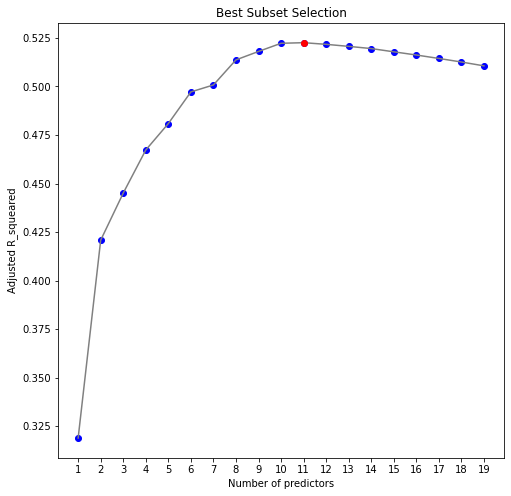

In [17]:

fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(range(1,20),r2_adj, 'bo')
ax.plot(range(1,20),r2_adj, color="grey")
plt.xticks([i for i in range(20)])
plt.plot(r2_adj.idxmax(),r2_adj.max(), marker="o", color="red")
ax.set(title="Best Subset Selection",
      xlabel="Number of predictors",
      ylabel="Adjusted R_squeared");

In [18]:
r2_adj.max(), r2_adj.idxmax()

(0.5225705787309167, 11)

In [214]:
def calcLogLikelihood(guess, true, n):
    error = true-guess
    sigma = np.std(error)
    f = ((1.0/(2.0*np.pi*sigma*sigma))**(n/2))* \
    np.exp(-1*((np.dot(error.T,error))/(2*sigma*sigma)))
    return np.log(f)

In [184]:
calcLogLikelihood(models_best['model'][2].predict(X[X.columns[0:2]]),y.values,19)

-582.3105430913781

In [194]:
AIC  = []
for i in range(1,20):
    L = calcLogLikelihood(models_best['model'][i].predict(X[X.columns[0:i]]),y.values,i)
    AIC.append(-2*np.log10(-L)+2*i)

In [192]:
AIC

[-2.2982950186781954,
 -1.3254616800099663,
 0.9093852842932986,
 2.274659927772017,
 4.31682914668444,
 6.370554303634261,
 9.35955981593893,
 10.759132170470997,
 12.785804078549928,
 14.993011594892844,
 16.764496849396156,
 18.828211567244672,
 20.850676223337054,
 22.928630858867145,
 25.055676628132037,
 26.891405194963987,
 28.837708611917407,
 31.092792971731395,
 33.178302712686374]

In [195]:
est = sm.OLS(y, sm.add_constant(X))
resp = est.fit()
print(resp.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     15.39
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           7.84e-32
Time:                        15:04:43   Log-Likelihood:                -1876.2
No. Observations:                 263   AIC:                             3792.
Df Residuals:                     243   BIC:                             3864.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         163.1036     90.779      1.797      

In [233]:
lr = LinearRegression()
lr_fit = lr.fit(X,y)
RSS = np.sum(np.square(lr.predict(X) - y))
R_squared = lr.score(X,y)
r2_adj_prueb= 1 - (RSS*(len(X)-1))/(TSS*(len(X)-19-1))
MSE = RSS/len(y)
AIC=-2*np.log10(MSE)+2*19 

In [234]:
R_squared,r2_adj_prueb,AIC

(0.5461158619125323, 0.5106269786875862, 28.07225565699916)

In [235]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1

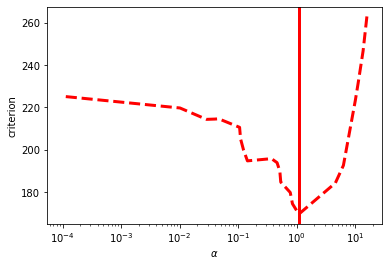

In [241]:
EPSILON = 1e-4
def plot_ic_criterion(model, name, color):
    criterion_ = model.criterion_
    plt.semilogx(model.alphas_ + EPSILON, criterion_, '--', color=color,
                 linewidth=3, label='%s criterion' % name)
    plt.axvline(model.alpha_ + EPSILON, color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel(r'$\alpha$')
    plt.ylabel('criterion')


plt.figure()
plot_ic_criterion(model_bic, 'BIC', 'r')